In [2]:
"""
CRISP-ML(Q) process model describes six phases:
# - Business and Data Understanding
# - Data Preparation
# - Model Building
# - Model Evaluation and Hyperparameter Tuning
# - Model Deployment
# - Monitoring and Maintenance

Client:
One of the leading companies in solar power generation.

Business Problem:
Manual inspection limitations lead to undetected defects, decreasing energy production and systems.

Business Objective:
Maximise energy production and system reliability through efficient defect detection.

Business Constraint:
Minimize resource utilization.
Maximizing energy production and system reliability.

Success criteria:
Business success criteria:
Increase in energy production efficiently by at least 10% and improvement in system reliability with a 20% reduction in downtime.

Machine Learning success criteria:Achieve an accuracy of at least 95%.

Economic success criteria:
Reduction in maintenance costs by 15% and Increase in return on investment (ROI) by 20% through improved efficiency.


Data Description:

GPVS-Faults: Experimental Data for fault scenarios in grid-connected PV systems under MPPT and IPPT modes

Overview:
The Grid-connected PV System Faults (GPVS-Faults) data are collected from lab experiments of faults in a PV microgrid system.
Experiment scenario, including photovoltaic array faults; inverter faults; grid anomalies; feedback sensor fault; and MPPT controller faults of various severity.
GPVS-Faults data can be used to design/ validate/ compare various algorithms of fault detection/ diagnosis/ classification for PV system protection and reactive maintenance.

Description:
The faults were introduced manually halfway during the experiments.
The high-frequency measurements are noisy; with disturbances and variations of temperature and insolation during and between the experiments; MPPT/IPPT modes have adverse effects on the detection of low-magnitude faults.
After critical faults, the operation is interrupted and the system may shut-down; the challenge is to detect the faults before a total failure.


Data Collection:
        Dimension: 12294 rows and 7 columns

Time: Time in seconds, average sampling T_s=9.9989 μs.
Ipv: PV array current measurement.
Vpv: PV array voltage measurement.
Vdc: DC voltage measurement.
ia, ib, ic: 3-Phase current measurements.
va, vb, vc: 3-Phase voltage measurements.
Iabc: Current magnitude.
If: Current frequency.
Vabc: Voltage magnitude.
Vf: Voltage frequency.
Defecitive/Non Defective: {0: Non-Defective, 1: Defective}

"""


'\nCRISP-ML(Q) process model describes six phases:\n# - Business and Data Understanding\n# - Data Preparation\n# - Model Building\n# - Model Evaluation and Hyperparameter Tuning\n# - Model Deployment\n# - Monitoring and Maintenance\n\nClient:\nOne of the leading companies in solar power generation.\n\nBusiness Problem:\nManual inspection limitations lead to undetected defects, decreasing energy production and systems.\n\nBusiness Objective:\nMaximise energy production and system reliability through efficient defect detection.\n\nBusiness Constraint:\nMinimize resource utilization.\nMaximizing energy production and system reliability.\n\nSuccess criteria:\nBusiness success criteria:\nIncrease in energy production efficiently by at least 10% and improvement in system reliability with a 20% reduction in downtime.\n\nMachine Learning success criteria:Achieve an accuracy of at least 95%.\n\nEconomic success criteria:\nReduction in maintenance costs by 15% and Increase in return on investmen

In [3]:
# Importing all required libraries, modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline

import pickle

import warnings
warnings.filterwarnings('ignore')

import joblib

In [4]:
# Load the datasets into Python dataframe
data = pd.read_csv("/content/solar_data.csv")
print(data.head())

       Time       Ipv         Vpv         Vdc        ia        ib        ic  \
0  8.491664  1.544891  101.300049  142.968750  0.381835 -0.490112  0.094844   
1  2.946039  2.320648   90.728760  146.777344  0.039428  0.584106 -0.670537   
2  6.059431  1.536377  101.623535  142.968750  0.301269  0.134277 -0.381841   
3  0.762262  2.373627   88.256836  147.363281  0.240844  0.429688 -0.636968   
4  0.601378  2.286591   88.409424  147.656250  0.475829  0.187988 -0.663823   

           va          vb          vc      Iabc        _If        Vabc  \
0 -110.466919  150.391235  -39.679209  0.465142  50.185838  154.751450   
1   -5.605316 -130.718384  136.930440  0.669008  49.907602  154.872942   
2 -113.673401  -30.859375  147.361552  0.447712  49.934645  154.892021   
3  -69.505920  -84.935608  154.325002  0.690778  50.330598  154.803659   
4 -106.067047  -46.361389  150.969849  0.699244  49.948302  155.071592   

          Vf  Defective / Non Defective  
0  49.995163                          

In [5]:
data.info

<bound method DataFrame.info of            Time       Ipv         Vpv         Vdc        ia        ib  \
0      8.491664  1.544891  101.300049  142.968750  0.381835 -0.490112   
1      2.946039  2.320648   90.728760  146.777344  0.039428  0.584106   
2      6.059431  1.536377  101.623535  142.968750  0.301269  0.134277   
3      0.762262  2.373627   88.256836  147.363281  0.240844  0.429688   
4      0.601378  2.286591   88.409424  147.656250  0.475829  0.187988   
...         ...       ...         ...         ...       ...       ...   
29995  3.035314  2.273346   87.188721  147.070312  0.348266 -0.671387   
29996  0.394598  1.448395  101.373291  144.140625  0.435546 -0.476685   
29997  2.888644  2.317810   90.399170  147.070312 -0.464112  0.691528   
29998  0.945134  1.495697  100.988770  144.140625 -0.517823  0.127563   
29999  3.122505  2.557159   87.957764  147.656250  0.247558  0.422974   

             ic          va          vb          vc      Iabc        _If  \
0      0.094844 -110.466919  150.391235  -39.679209  0.465142  50.185838   
1     -0.670537   -5.605316 -130.718384  136.930440  0.669008  49.907602   
2     -0.381841 -113.673401  -30.859375  147.361552  0.447712  49.934645   
3     -0.636968  -69.505920  -84.935608  154.325002  0.690778  50.330598   
4     -0.663823 -106.067047  -46.361389  150.969849  0.699244  49.948302   
...         ...         ...         ...         ...       ...        ...   
29995  0.316401  -74.110718  153.971405  -81.544291  0.663070  50.216318   
29996  0.047847 -110.768280  149.909058  -40.374349  0.509297  50.163328   
29997 -0.247563  109.466400 -150.535889   41.877136  0.691658  49.856226   
29998  0.363398  148.088837  -34.873505 -113.597056  0.501731  50.058510   
29999 -0.636968  -57.318878  -93.783569  154.120077  0.671411  49.954470   

             Vabc         Vf  Defective / Non Defective  
0      154.751450  49.995163                          0  
1      154.872942  50.001987                          0  
2      154.892021  50.008262                          1  
3      154.803659  49.993744                          1  
4      155.071592  50.004186                          1  
...           ...        ...                        ...  
29995  154.996440  50.011969                          1  
29996  155.168063  50.008520                          1  
29997  154.988094  50.008975                          0  
29998  154.936311  49.999278                          0  
29999  155.226651  49.977158                          1  

[30000 rows x 15 columns]>

In [6]:
# Separate features and target variable
X = data.drop('Defective / Non Defective', axis = 1)
y = data['Defective / Non Defective']


In [8]:
!pip install scikit-learn

In [17]:
# Import packages for classification models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("logistic Regression Accuracy:", accuracy_logreg)

logistic Regression Accuracy: 0.7178333333333333


In [19]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.969


In [20]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9896666666666667


In [21]:
# Support Vector Machines (SW)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.735


In [23]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.45216666666666666


In [24]:
# Gradient Boosting

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.9801666666666666


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [27]:
############################ Logistic Regression Hyperparmeter tuning
logreg = LogisticRegression()
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5)
logreg_grid_search.fit(X_train, y_train)
logreg_best = logreg_grid_search.best_estimator_
y_pred_logreg = logreg_best.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Best Parameters:", logreg_grid_search.best_params_)

Logistic Regression Accuracy: 0.7183333333333334
Best Parameters: {'C': 0.01}


In [28]:
# Train accuracy
y_train_pred_logreg = logreg_best.predict(X_train)
accuracy_train_logreg = accuracy_score(y_train, y_train_pred_logreg)
print("Logistic Regression Train Accuracy:", accuracy_train_logreg)

Logistic Regression Train Accuracy: 0.7120833333333333


In [29]:
# Test accuracy
y_pred_logreg = logreg_best.predict(X_test)
accuracy_test_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Test Accuracy:", accuracy_test_logreg)


Logistic Regression Test Accuracy: 0.7183333333333334


In [30]:
import joblib

# Save the best logistic regression model to a file using Joblib
joblib.dump(logreg_best, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [31]:
import joblib

# Save the best logistic regression model to a file using Joblib
joblib.dump(logreg_best, 'logistic_regression_model.joblib')

'''  either Joblib or Pickle based on your preference. Joblib is more efficient for large numpy arrays, while Pickle is more flexible and can handle a wider range of objects.'''

'  either Joblib or Pickle based on your preference. Joblib is more efficient for large numpy arrays, while Pickle is more flexible and can handle a wider range of objects.'

In [32]:
####################### Decision Tree

dt = DecisionTreeClassifier() # Define the Decision Tree classifier
dt_param_grid = {'max_depth': [None, 5, 10, 15, 20]} # Define the parameter grid for GridSearchCV
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5) # Initialize GridSearchCV for Decision Tree
dt_grid_search.fit(X_train, y_train) # Fit GridSearchCV to the training data
dt_best = dt_grid_search.best_estimator_ # Get the best estimator from GridSearchCV
y_pred_dt = dt_best.predict(X_test) # Make predictions on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt) # Calculate accuracy on the test set
print("Decision Tree Accuracy:", accuracy_dt)# Print the accuracy and best parameters
print("Best Parameters:", dt_grid_search.best_params_)

Decision Tree Accuracy: 0.9718333333333333
Best Parameters: {'max_depth': 15}


In [33]:
# Train accuracy
y_train_pred_dt = dt_best.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print("Decision Tree Train Accuracy:", accuracy_train_dt)

Decision Tree Train Accuracy: 0.9952916666666667


In [42]:
# Test accuracy
y_pred_dt = dt_best.predict(X_test)
accuracy_test_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Test Accuracy:", accuracy_test_dt)


Decision Tree Test Accuracy: 0.9718333333333333


In [35]:
import joblib

# Save the best Decision Tree model to a file using Joblib
joblib.dump(dt_best, 'Decision_Tree_model.joblib')

['Decision_Tree_model.joblib']

In [36]:
import pickle

# Save the best decision tree model to a file using Pickle
with open('best_decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_best, f)


In [37]:
#################### Random Forest
rf = RandomForestClassifier()
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 15]}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best = rf_grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Best Parameters:", rf_grid_search.best_params_)

Random Forest Accuracy: 0.9915
Best Parameters: {'max_depth': None, 'n_estimators': 200}


In [38]:
# Train accuracy
y_train_pred_rf = rf_best.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Train Accuracy:", accuracy_train_rf)

Random Forest Train Accuracy: 1.0


In [39]:
# Test accuracy
y_pred_rf = rf_best.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", accuracy_test_rf)

Random Forest Test Accuracy: 0.9915


In [40]:
import pickle

# Save the best random forest model to a file using Pickle
with open('best_random_forest_model.pkl', 'wb') as f:
    pickle.dump(dt_best, f)


In [41]:
import joblib

# Save the best random forest model to a file using Joblib
joblib.dump(rf_best, 'best_random_forest_model.joblib')

['best_random_forest_model.joblib']

In [43]:
# Support Vector Machines (SVM)
svm = SVC()
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
svm_best = svm_grid_search.best_estimator_
y_pred_svm = svm_best.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Best Parameters:", svm_grid_search.best_params_)

SVM Accuracy: 0.9155
Best Parameters: {'C': 10, 'gamma': 0.01}


In [44]:
# Train accuracy
y_train_pred_svm = svm_best.predict(X_train)
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
print("SVM Train Accuracy:", accuracy_train_svm)

SVM Train Accuracy: 0.9405833333333333


In [45]:
# Test accuracy
y_pred_svm = svm_best.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Test Accuracy:", accuracy_test_svm)

SVM Test Accuracy: 0.9155


In [46]:
import pickle
# Save the best SVM model to a file using Pickle
with open('best_svm_model.pkl', 'wb') as f:
    pickle.dump(svm_best, f)

In [47]:
import joblib

# Save the best svm model to a file using Joblib
joblib.dump(svm_best, 'best_SVM_model.joblib')

['best_SVM_model.joblib']

In [48]:
############# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.45216666666666666


In [50]:
#### Gradient Boosting
gb = GradientBoostingClassifier()
gb_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
gb_best = gb_grid_search.best_estimator_
y_pred_gb = gb_best.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Best Parameters:", gb_grid_search.best_params_)

Gradient Boosting Accuracy: 0.9901666666666666
Best Parameters: {'max_depth': 5, 'n_estimators': 150}


In [51]:
# Train accuracy
y_train_pred_gb = gb_best.predict(X_train)
accuracy_train_gb = accuracy_score(y_train, y_train_pred_gb)
print("Gradient Boosting Train Accuracy:", accuracy_train_gb)

Gradient Boosting Train Accuracy: 0.996625


In [52]:
# Test accuracy
y_pred_gb = gb_best.predict(X_test)
accuracy_test_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Test Accuracy:", accuracy_test_gb)

Gradient Boosting Test Accuracy: 0.9901666666666666


In [53]:
import pickle

# Save the best gradient boosting model to a file using Pickle
with open('best_gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb_best, f)

In [ ]:
import joblib

# Save the best gradient boosting model to a file using Joblib
joblib.dump(gb_best, 'best_gradient_boosting_model.joblib')

In [55]:
### Curve Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

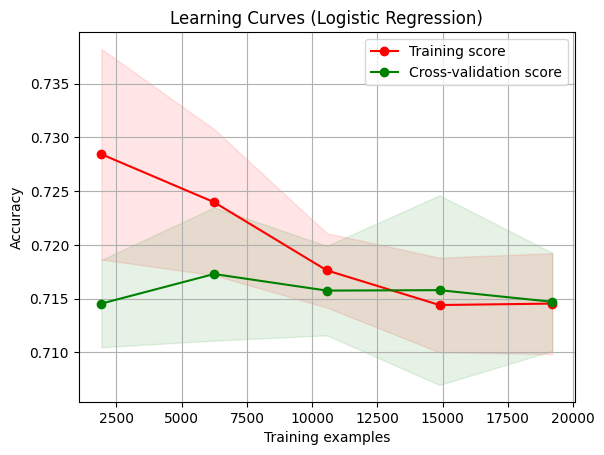

In [56]:
# Logistic Regression
title = "Learning Curves (Logistic Regression)"
logreg = LogisticRegression(C=1)  # assuming the best parameter from previous grid search
plot_learning_curve(logreg, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

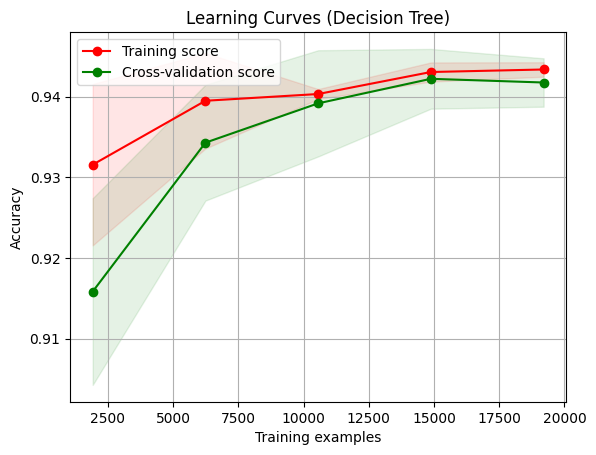

In [57]:
# Decision Tree
title = "Learning Curves (Decision Tree)"
dt = DecisionTreeClassifier(max_depth=5)  # assuming the best parameter from previous grid search
plot_learning_curve(dt, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

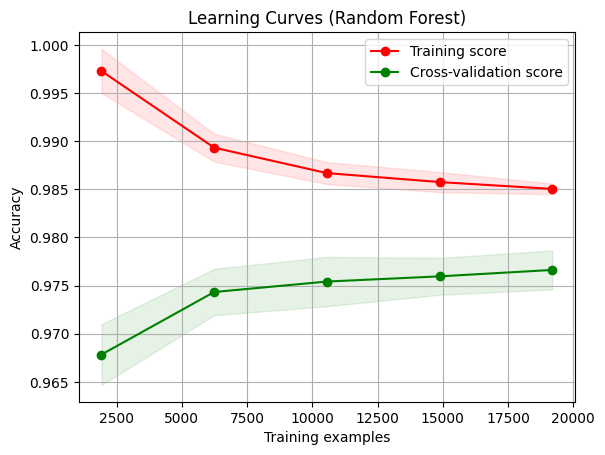

In [58]:
# Random Forest
title = "Learning Curves (Random Forest)"
rf = RandomForestClassifier(n_estimators=300, max_depth=10)  # assuming the best parameter from previous grid search
plot_learning_curve(rf, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

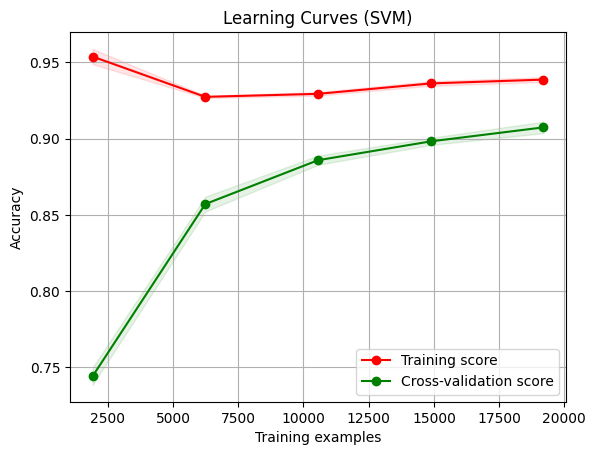

In [59]:
# Support Vector Machines (SVM)
title = "Learning Curves (SVM)"
svm = SVC(C=10, gamma=0.01)  # assuming the best parameter from previous grid search
plot_learning_curve(svm, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

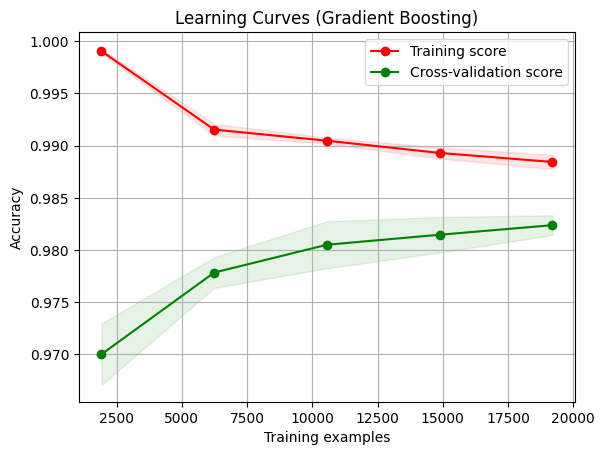

In [60]:
# Gradient Boosting
title = "Learning Curves (Gradient Boosting)"
gb = GradientBoostingClassifier(n_estimators=100, max_depth=4)  # assuming the best parameter from previous grid search
plot_learning_curve(gb, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()